In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [26]:
music_df = pd.read_csv('music.csv')
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60,0.896000,0.726,214547,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,Jazz
1,63,0.003840,0.635,190448,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,Rap
2,59,0.000075,0.352,456320,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,Electronic
3,54,0.945000,0.488,352280,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,Rock
4,55,0.245000,0.667,273693,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,Rap


* Creating dummy variables

Being able to include categorical features in the model building process can enhance performance as they may add information that contributes to prediction accuracy.

The music_df dataset has been preloaded for you, and its shape is printed. Also, pandas has been imported as pd.

Now you will create a new DataFrame containing the original columns of music_df plus dummy variables from the "genre" column.

* Instructions

Use a relevant function, passing the entire music_df DataFrame, to create music_dummies, dropping the first binary column.
Print the shape of music_dummies.

In [27]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df, drop_first=True)

# Print the new DataFrame's shape
print("Shape of music_dummies: {}".format(music_dummies.shape))

Shape of music_dummies: (1000, 20)


In [28]:
music_dummies.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
0,60,0.896000,0.726,214547,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,0,0,0,0,0,0,1,0,0
1,63,0.003840,0.635,190448,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,0,0,0,0,0,0,0,1,0
2,59,0.000075,0.352,456320,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,0,0,0,0,1,0,0,0,0
3,54,0.945000,0.488,352280,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,0,0,0,0,0,0,0,0,1
4,55,0.245000,0.667,273693,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,0,0,0,0,0,0,0,1,0


In [29]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge

# Create X and y
X = music_dummies.drop("popularity", axis=1).values
y = music_dummies["popularity"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Instantiate a ridge model
ridge = Ridge(alpha=0.2)

# Perform cross-validation
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")

# Calculate RMSE
rmse = np.sqrt(-scores)
print("Average RMSE: {}".format(np.mean(rmse)))
print("Standard Deviation of the target array: {}".format(np.std(y)))

Average RMSE: 12.626821731303384
Standard Deviation of the target array: 14.02156909907019


* Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

* Instructions 1/3

Print the number of missing values for each column in the music_df dataset, sorted in ascending order.

In [30]:
# Print missing values for each column
# df = pd.read_csv('music_clean.csv')
print(music_df.isna().sum().sort_values())

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


* Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

* Instructions 2/3

Remove values for all columns with 50 or fewer missing values.

In [31]:
# Print missing values for each column
print(music_df.isna().sum().sort_values())

# Remove values where less than 5% are missing
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


* Dropping missing data

Over the next three exercises, you are going to tidy the music_df dataset. You will create a pipeline to impute missing values and build a KNN classifier model, then use it to predict whether a song is of the "Rock" genre.

In this exercise specifically, you will drop missing values accounting for less than 5% of the dataset, and convert the "genre" column into a binary feature.

* Instructions 3/3

Convert music_df["genre"] to values of 1 if the row contains "Rock", otherwise change the value to 0.

In [32]:
# Print missing values for each column
df = music_df
print(df.isna().sum().sort_values())

# Remove values where less than 5% are missing
df = df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])

# Convert genre to a binary feature
df["genre"] = np.where(df["genre"] == "Rock", 1, 0)

print(df.isna().sum().sort_values())
print("Shape of the `music_df`: {}".format(df.shape))

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
Shape of the `music_df`: (1000, 12)


* Pipeline for song genre prediction: I
Now it's time to build a pipeline. It will contain steps to impute missing values using the mean for each feature and build a KNN model for the classification of song genre.

The modified music_df dataset that you created in the previous exercise has been preloaded for you, along with KNeighborsClassifier and train_test_split.

* Instructions

Import SimpleImputer and Pipeline.
Instantiate an imputer.
Instantiate a KNN classifier with three neighbors.
Create steps, a list of tuples containing the imputer variable you created, called "imputer", followed by the knn model you created, called "knn".

In [33]:
# Import modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 

# Instantiate an imputer
imputer = SimpleImputer()

# Instantiate a knn model
knn = KNeighborsClassifier(n_neighbors=3)


# Build steps for the pipeline
steps = [("imputer", imputer), 
         ("knn", knn)]

Code from chapter_4 slides

In [37]:
from sklearn.impute import SimpleImputer
X_cat = music_df["genre"].values.reshape(-1, 1)
X_num = music_df.drop(["genre", "popularity"], axis=1).values
y = music_df["popularity"].values
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2,
random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2,
random_state=12)
imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

In [38]:
imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)

In [39]:
from sklearn.pipeline import Pipeline
music_df = music_df.dropna(subset=["genre", "popularity", "loudness", "liveness", "tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

In [44]:
from sklearn.linear_model import LogisticRegression

steps = [("imputation", SimpleImputer()),
("logistic_regression", LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.49666666666666665

* Pipeline for song genre prediction: II
Having set up the steps of the pipeline in the previous exercise, you will now use it on the music_df dataset to classify the genre of songs. What makes pipelines so incredibly useful is the simple interface that they provide.

X_train, X_test, y_train, and y_test have been preloaded for you, and confusion_matrix has been imported from sklearn.metrics.

* Instructions

Create a pipeline using the steps you previously defined.
Fit the pipeline to the training data.
Make predictions on the test set.
Calculate and print the confusion matrix.

In [45]:
from sklearn.metrics import confusion_matrix

imp_mean = SimpleImputer(strategy="mean")

# Build steps for the pipeline
steps = [("imputer", imp_mean), 
         ("knn", knn)]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[65 89]
 [76 70]]


* Centering and scaling for regression
Now you have seen the benefits of scaling your data, you will use a pipeline to preprocess the music_df features and build a lasso regression model to predict a song's loudness.

X_train, X_test, y_train, and y_test have been created from the music_df dataset, where the target is "loudness" and the features are all other columns in the dataset. Lasso and Pipeline have also been imported for you.

Note that "genre" has been converted to a binary feature where 1 indicates a rock song, and 0 represents other genres.

* Instructions

Import StandardScaler.
Create the steps for the pipeline object, a StandardScaler object called "scaler", and a lasso model called "lasso" with alpha set to 0.5.
Instantiate a pipeline with steps to scale and build a lasso regression model.
Calculate the R-squared value on the test data.

In [47]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# Create X and y
X = music_df.drop("loudness", axis=1).values
y = music_df["loudness"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

0.7185052288252618


* Centering and scaling for classification
Now you will bring together scaling and model building into a pipeline for cross-validation.

Your task is to build a pipeline to scale features in the music_df dataset and perform grid search cross-validation using a logistic regression model with different values for the hyperparameter C. The target variable here is "genre", which contains binary values for rock as 1 and any other genre as 0.

StandardScaler, LogisticRegression, and GridSearchCV have all been imported for you.

* Instructions

Build the steps for the pipeline: a StandardScaler() object named "scaler", and a logistic regression model named "logreg".
Create the parameters, searching 20 equally spaced float values ranging from 0.001 to 1.0 for the logistic regression model's C hyperparameter within the pipeline.
Instantiate the grid search object.
Fit the grid search object to the training data.

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

0.49000000000000005 
 {'logreg__C': 0.05357894736842105}


* Visualizing regression model performance
Now you have seen how to evaluate multiple models out of the box, you will build three regression models to predict a song's "energy" levels.

The music_df dataset has had dummy variables for "genre" added. Also, feature and target arrays have been created, and these have been split into X_train, X_test, y_train, and y_test.

The following have been imported for you: LinearRegression, Ridge, Lasso, cross_val_score, and KFold.

* Instructions

Write a for loop using model as the iterator, and model.values() as the iterable.
Perform cross-validation on the training features and the training target array using the model, setting cv equal to the KFold object.
Append the model's cross-validation scores to the results list.
Create a box plot displaying the results, with the x-axis labels as the names of the models.

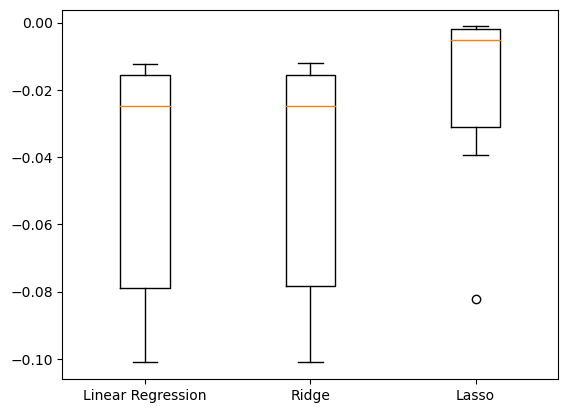

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    # Append the results
    results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

* Predicting on the test set
In the last exercise, linear regression and ridge appeared to produce similar results. It would be appropriate to select either of those models; however, you can check predictive performance on the test set to see if either one can outperform the other.

You will use root mean squared error (RMSE) as the metric. The dictionary models, containing the names and instances of the two models, has been preloaded for you along with the training and target arrays X_train_scaled, X_test_scaled, y_train, and y_test.

* Instructions

Import mean_squared_error.
Fit the model to the scaled training features and the training labels.
Make predictions using the scaled test features.
Calculate RMSE by passing the test set labels and the predicted labels.

In [57]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    # Fit the model to the training data
    model.fit(X_train_scaled, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate the test_rmse
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    print("{} Test Set RMSE: {}".format(name, test_rmse))

Linear Regression Test Set RMSE: 0.5055777648385923
Ridge Test Set RMSE: 0.5055720941626436
Lasso Test Set RMSE: 0.500161751614193


* Visualizing classification model performance

In this exercise, you will be solving a classification problem where the "popularity" column in the music_df dataset has been converted to binary values, with 1 representing popularity more than or equal to the median for the "popularity" column, and 0 indicating popularity below the median.

Your task is to build and visualize the results of three different models to classify whether a song is popular or not.

The data has been split, scaled, and preloaded for you as X_train_scaled, X_test_scaled, y_train, and y_test. Additionally, KNeighborsClassifier, DecisionTreeClassifier, and LogisticRegression have been imported.

* Instructions

Create a dictionary of "Logistic Regression", "KNN", and "Decision Tree Classifier", setting the dictionary's values to a call of each model.
Loop through the values in models.
Instantiate a KFold object to perform 6 splits, setting shuffle to True and random_state to 12.
Perform cross-validation using the model, the scaled training features, the target training set, and setting cv equal to kf.

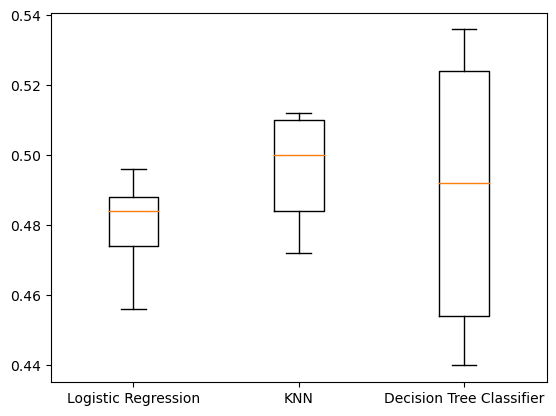

In [58]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
    
    # Instantiate a KFold object
    kf = KFold(n_splits=6, random_state=12, shuffle=True)
    
    # Perform cross-validation
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

* Pipeline for predicting song popularity
For the final exercise, you will build a pipeline to impute missing values, scale features, and perform hyperparameter tuning of a logistic regression model. The aim is to find the best parameters and accuracy when predicting song genre!

All the models and objects required to build the pipeline have been preloaded for you.

* Instructions

Create the steps for the pipeline by calling a simple imputer, a standard scaler, and a logistic regression model.
Create a pipeline object, and pass the steps variable.
Instantiate a grid search object to perform cross-validation using the pipeline and the parameters.
Print the best parameters and compute and print the test set accuracy score for the grid search object.

In [61]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

Tuned Logistic Regression Parameters: {'logreg__C': 0.556, 'logreg__solver': 'newton-cg'}, Accuracy: 0.5
